### Troubleshooting: Set working directory

In [ ]:
# import os 
# print("starting directory: ", os.getcwd())
# os.chdir("/w/halld-scshelf2101/home/dbarton/gluex/analysis_KpiLambda")
# print("changed directory to: ", os.getcwd())
# !source /u/home/dbarton/.cshrc
# !source /group/halld/Software/build_scripts/gluex_env_jlab.csh

# import ROOT

######## figuring out what shell is being used inside this notebook #########

# Check what shell is being used:
# !echo $SHELL

# check which shell Jupyter actually spawned:
# !ps -p $$ -o comm=

# Check your default shell:
# !getent passwd $USER

# Check to see if tcsh shell is available in this session:
# !getent passwd $USER

# Envorinment variable mismatch?
# !env | grep SHELL

### Startup FSRoot environment and set global variables

In [ ]:
# README: To use FSRoot in Jupyter Notebooks you need to be in a special container per  https://lan13005.github.io/PyAmpTools/intro.html#apptainer-usage

# STEP 1: Open a terminal on ifarm

# STEP 2: Initialize the container using this alias (defined here below)
# $ fshell ######## --> This outputs a "localhost" URL, among other things.

# STEP 3: Select your kernel in VS Code
    # Open/create your Jupyter Notebook --> Select "Open new Jupyter kernel" --> copy & paste URL from STEP 2 --> press ENTER

# Note: you can run this alias directly in a Jupyter Notebook cell with '!fshell'.  But it often crashes.  Just do it in a terminal.

# Alias definition in STEP 2:
# Add these lines to your shell configuration file (~/.cshrc for tcsh):
# alias fshell 'apptainer exec --contain --writable-tmpfs -B /w/halld-scshelf2101/home/dbarton/gluex,/scratch --env BASH_ENV=/dev/null /w/halld-scshelf2101/lng/WORK/PyAmpTools9/pyamptools.sif bash -c "source /etc/bash.bashrc; jupyter-lab --no-browser --port=8888; exec bash"'

In [1]:
import ROOT
from pyamptools import atiSetup
import os
os.chdir("/w/halld-scshelf2101/home/dbarton/gluex/analysis_KpiLambda")
os.listdir()
atiSetup.setup(globals(), use_fsroot=True)
fileName = '/w/halld-scshelf2101/home/dbarton/gluex/analysis_KpiLambda/pi0kplamb_FSflat_2018_08.root'
treeName = 'ntFSGlueX_100000000_100001'

# USEFUL TUTORIAL: https://halldweb.jlab.org/DocDB/0055/005596/001/20220523_GlueX_AnWorkshop_Malte.pdf

# CREATING THE ROOT FILE WITH FSROOT

    # IMPORTANT: All this code depends on the using the correct indices for particles when passing values to functions.  The indices are set when 'flattening' a file by this flag: -mctag[MCExtras_MCDecayCode2_MCDecayCode1]

    # To nderstand the indices, you can use the 'flatten' command in the terminal or refer to this documentation: https://github.com/remitche66/FSRoot/blob/master/Documentation/FSRoot.pdf (pg. 8).

# FLATTENED USING:
# ifarm2401.jlab.org:dbarton> flatten -in /cache/halld/RunPeriod-2018-08/analysis/ver23/tree_pi0kplamb__B4_M18/merged/tree_pi0kplamb__B4_M18_051768.root -out pi0kplamb_FSflat_2018_08.root -mctag 0_1_100001

# REACTION: gamma p --> K+ pi0 Lambda

# INDICES ASSIGNED BY 'flatten':
# 1. DecayingLambda (0)   1a. Proton (1)   1b. PiMinus (2)
# 2. KPlus (3)
# 3. DecayingPi0 (4)   3a. Photon1 (5)   3b. Photon2 (6)
# Note the indices are [1, 1a, 1b, etc.] not numbers in parentheses.

# DEFINE STRINGS FOR TO PASS TO FSROOT FUNCTIONS INSTEAD OF PARTICLE INDICES (for readability):
DecayingLambda = "0"
Proton = "1a"
PiMinus = "1b"
KPlus = "2"
DecayingPi0 = "3"
Photon1 = "3a"
Photon2 = "3b"

# BASIC CUTS JUSTIN'S SURVEY
# Unused shower E, target Z, MM^2, KinFitChi^2/DOF
# Dominant background is: p pip pim pi0

# DEFINE CUTS
ROOT.FSCut.defineCut("chi2","Chi2DOF","0.0","10.0")
ROOT.FSCut.defineCut("unusedE","EnUnusedSh","0.0","0.1") # UnusedEnergy < 0.1 GeV (unused "shower"? energy)
ROOT.FSCut.defineCut("unusedTracks","NumUnusedTracks<1") # No unused tracks
ROOT.FSCut.defineCut("coherentPeak","EnPB","8.2","8.8") # Coherent peak: 8.2 < E_beam < 8.8


# DEFINE INVARIANT MASSES
# ROOT.FSCut.defineCut("constrainLambda","") # Start unconstrained, then try constraining Lambda
# ROOT.FSCut.defineCut("lambdaMissingMass","") # 
# ROOT.FSCut.defineCut("sigma") # cut on sigma(1385)

# TO DO, KEVIN 2/7/2025.  Some plots to start out
# masses, momentum, chi2, RFdeltaT's, Dalitz plots, angle stuff



Welcome to JupyROOT 6.28/06
atiSetup| jupyter-lab called python3.9

------------------------------------------------
atiSetup| MPI is disabled
atiSetup| GPU is disabled
------------------------------------------------


atiSetup| Loading library libIUAmpTools.so ............  ON
atiSetup| Loading library libAmpTools.so ..............  ON
atiSetup| Loading library libAmpPlotter.so ............  ON
atiSetup| Loading library libAmpsDataIO.so ............  ON
atiSetup| Loading library libFSRoot.so ................  ON
atiSetup| Loading library libAmpsGen.so ...............  OFF


------------------------------------------------
------------------------------------------------

atiSetup| minor warning: Unable to alias omegapiAngles - doesn't exist under ROOT namespace
atiSetup| minor warning: Unable to alias URtypes - doesn't exist under ROOT namespace
atiSetup| minor warning: Unable to alias URConfig - doesn't exist under ROOT namespace
atiSetup| minor warning: Unable to alias FSFitFunctio

### List contents of ROOT file

In [ ]:
def list_trees_and_branches(fileName):
    file = ROOT.TFile.Open(fileName)
    # Loop over all keys in the file
    for key in file.GetListOfKeys():
        obj = key.ReadObj()
        # Check if the object is a tree
        if isinstance(obj, ROOT.TTree):
            tree = obj
            print(f"Tree Name: {tree.GetName()}")
            print("Branches:")
            # List all branches in the tree
            branches = tree.GetListOfBranches()
            for branch in branches:
                print(f" - {branch.GetName()}")

    # Close the file
    file.Close()

list_trees_and_branches(fileName)

### Beam Energy

In [ ]:
from IPython.display import Image, display

plotTitle = 'Beam energy'
plot2Title = 'Beam energy measured'
axisLabel = 'Beam energy [GeV]'

canvas = ROOT.TCanvas('c', 'c', 800, 600)
    
h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, "beam_e", "(80, 0.0, 14.0)", "")
h1.SetStats(False)
h1.SetLineColor(ROOT.kBlue)
h1.GetXaxis().SetTitle(axisLabel)
h1.GetYaxis().SetTitle('Events')
h1.Draw()

h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, "beam_e_measured", "(80, 0.0, 14.0)", "")
h2.SetStats(False)
h2.SetMarkerStyle(24)
h2.SetMarkerColor(ROOT.kRed)
h2.GetXaxis().SetTitle(axisLabel)
h2.GetYaxis().SetTitle('Events')
h2.Draw('p same')
    
legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.75)
# legend1.AddEntry(h1.GetValue(), plotTitle, 'l')
# legend1.AddEntry(h2.GetValue(), plot2Title, 'p')
legend1.Draw('same')

img_path = 'plots/pi0kplamb_beam_e.png'
canvas.SaveAs(img_path)
canvas.Close()
display(Image(filename=img_path))

### Target proton

In [ ]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
latex = ROOT.TLatex()

plotTitle = 'Target proton mass'
axisLabel = 'Mass (target proton) [GeV/c^{2}]'

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({?????})", "(80, 0.0, 4.0)", "")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    latex.DrawLatexNDC(0.3, 0.95, plotTitle)
    
    legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.85)
    legend1.AddEntry(h1, f'{plotTitle} no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/pi0kplamb_target_m_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### $K^{+}$ $\pi^{0}$ $\pi^{-}$

In [ ]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
latex = ROOT.TLatex()

plotTitle = 'Mass(K^{+} \pi^{0} \pi^{-}) [GeV/c^{2}]'
axisLabel = 'Mass (K^{+} \pi^{0} \pi^{-}) [GeV/c^{2}]'

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({KPlus},{DecayingPi0},{PiMinus})", "(80, 0.0, 4.0)", "")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    latex.DrawLatexNDC(0.3, 0.95, plotTitle)
    
    legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.85)
    legend1.AddEntry(h1, f'{plotTitle} no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/pi0kplamb_kpPi0Pim_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### $K^{+} \pi^{0}$ (can be $K^{*}$)

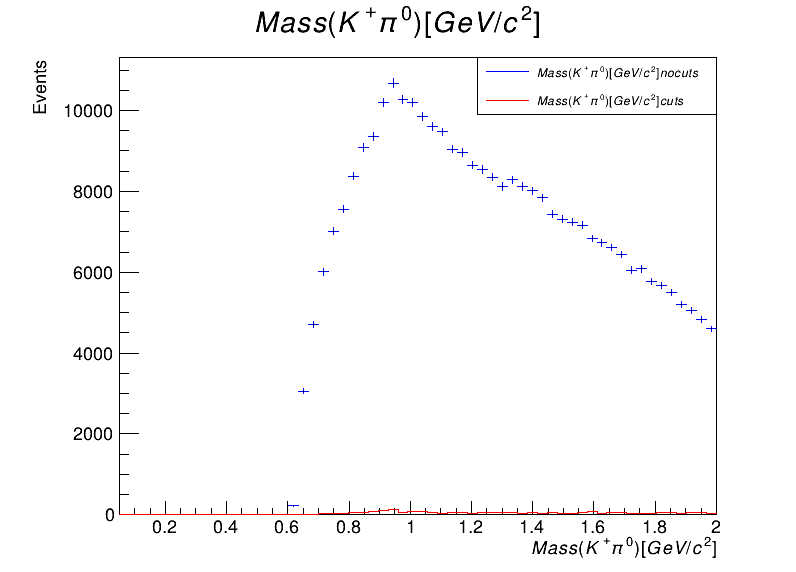

    FOUND HISTOGRAM...    FSRootHist:000001   OKAY           (entries = 369565)
    FOUND HISTOGRAM...    FSRootHist:000002   OKAY           (entries = 2783)


Info in <TCanvas::Print>: pdf file plots/pi0kplamb_kpPi0_m.pdf has been created
Info in <TCanvas::Print>: png file plots/pi0kplamb_kpPi0_m.png has been created


In [29]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
latex = ROOT.TLatex()

plotTitle = 'Mass (K^{+} \pi^{0}) [GeV/c^{2}]'
axisLabel = 'Mass (K^{+} \pi^{0}) [GeV/c^{2}]'

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)
    
    # FOR MULTIPLE FINAL STATES AND TO MANAGE PARTICLE COMBINATORICS WITHIN THOSE FINAL STATES.
    # h1 = ROOT.FSModeHistogram.getTH1F(fileName, treeName, "MASS([K+],[pi0],[pi-])", "(60, 0.05, 2.0)", "")

    # h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, "MASS(2,3)", "(60, 0.05, 2.0)", "")
    # h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, "MASS(2,3)", "(60, 0.05, 2.0)", "CUT(chi2,unusedE,unusedTracks,coherentPeak)")
    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({KPlus},{DecayingPi0})", "(60, 0.05, 2.0)", "")
    h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({KPlus},{DecayingPi0})", "(60, 0.05, 2.0)", "CUT(chi2,unusedE,unusedTracks,coherentPeak)")


    # h1.SetTitle("")
    # h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    # latex.DrawLatexNDC(0.3, 0.95, plotTitle)
    legend1 = ROOT.TLegend(0.60, 0.80, 0.90, 0.90) # x_left, y_bottom, x_right, y_top
    legend1.AddEntry(h1, f'{plotTitle} no cuts', 'l')
    legend1.Draw('same')

    h2.SetStats(False)
    h2.SetLineColor(ROOT.kRed)
    h2.GetXaxis().SetTitle(axisLabel)
    h2.GetYaxis().SetTitle('Events')
    h2.Draw('same, hist')
    legend1.AddEntry(h2, plotTitle + ' cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/pi0kplamb_kpPi0_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### $K^{+}$ mass

In [68]:
from IPython.display import Image, display
latex = ROOT.TLatex()

plotTitle = 'Mass K^{+}'
axisLabel = 'Mass (K^{+}) [GeV/c^{2}]'

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({KPlus})", "(60, 0.05, 2.0)", "")
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    latex.DrawLatexNDC(0.3, 0.95, plotTitle)  # Prints label on .pdf output to saved file.

    h2 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({KPlus})", "(60, 0.05, 2.0)", "CUT(chi2,unusedE,unusedTracks,coherentPeak)")
    h2.SetStats(False)
    h2.SetMarkerStyle(20)
    h2.SetMarkerColor(ROOT.kRed)
    h2.SetMarkerSize(1.0)
    h2.GetXaxis().SetTitle(axisLabel)
    h2.GetYaxis().SetTitle('Events')
    h2.Draw('P')

    legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.85)
    legend1.AddEntry(h1, plotTitle + 'no cuts', 'l')
    # legend1.AddEntry(h2, plotTitle + 'cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/pi0kplamb_kp_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.Close()
    display(Image(filename=img_path + '.png'))

plot_hist()

### $\pi_{0}$ mass

In [88]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
latex = ROOT.TLatex()

plotTitle = '$\pi^{0}$ Mass'
axisLabel = '$Mass (\pi^{0})$ [GeV/c^{2}]'

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingPi0})", "(80, 0.0, 4.0)", "")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    latex.DrawLatexNDC(0.3, 0.95, plotTitle)
    
    legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.85)
    legend1.AddEntry(h1, f'{plotTitle} no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/pi0kplamb_Pi0_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()

### $\Lambda$ mass

In [90]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
latex = ROOT.TLatex()

plotTitle = '\Lambda$ Mass'
axisLabel = 'Mass (p \pi^{-}) [GeV/c^{2}]'

def plot_hist():

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    canvas.SetLeftMargin(0.15)

    h1 = ROOT.FSHistogram.getTH1F(fileName, treeName, f"MASS({DecayingLambda})", "(80, 0.0, 4.0)", "")
    h1.SetTitle(plotTitle)
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    latex.DrawLatexNDC(0.3, 0.95, plotTitle)
    
    legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.85)
    legend1.AddEntry(h1, f'{plotTitle} no cuts', 'l')
    legend1.Draw('same')

    img_path = 'plots/pi0kplamb_Lambda_m'
    canvas.SaveAs(img_path + '.pdf')
    canvas.SaveAs(img_path + '.png')
    canvas.Close()
    display(Image(filename=img_path + '.png'))
    os.remove(img_path + '.png')

plot_hist()


### $\gamma_{1}$ energy

In [ ]:
from IPython.display import Image, display

plotTitle = '$\gamma_{1}$ Energy'
plot2Title = '$\gamma_{1}$ Momentum'
axisLabel = '$Energy (\gamma_{1}) \ [GeV]$'

def plot_hist(df):

    dfFiltered = df

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    
    h1 = dfFiltered.Histo1D(('photon1_E', plotTitle, 120, -1.0, 6.0), 'photon1_E')
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()

    h2 = dfFiltered.Histo1D(('photon1_p', plot2Title, 120, -1.0, 6.0), 'photon1_p')
    h2.SetStats(False)
    h2.SetMarkerStyle(24)
    h2.SetMarkerColor(ROOT.kRed)
    h2.GetXaxis().SetTitle(axisLabel)
    h2.GetYaxis().SetTitle('Events')
    h2.Draw('p same')
    
    legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.75)
    legend1.AddEntry(h1.GetValue(), plotTitle, 'l')
    legend1.AddEntry(h2.GetValue(), plot2Title, 'p')
    legend1.Draw('same')

    img_path = 'plots/pi0kplamb_photon1_E.png'
    canvas.SaveAs(img_path)
    canvas.Close()
    display(Image(filename=img_path))

plot_hist(dfpi0kplamb)

### $\gamma_{2}$ energy

In [ ]:
from IPython.display import Image, display

plotTitle = '$\gamma_{2}$ Energy'
plot2Title = '$\gamma_{2}$ Momentum'
axisLabel = '$Energy (\gamma_{2}) \ [GeV]$'

def plot_hist(df):

    dfFiltered = df

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    
    h1 = dfFiltered.Histo1D(('photon1_E', plotTitle, 120, -1.0, 6.0), 'photon2_E')
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()

    h2 = dfFiltered.Histo1D(('photon1_p', plot2Title, 120, -1.0, 6.0), 'photon2_p')
    h2.SetStats(False)
    h2.SetMarkerStyle(24)
    h2.SetMarkerColor(ROOT.kRed)
    h2.GetXaxis().SetTitle(axisLabel)
    h2.GetYaxis().SetTitle('Events')
    h2.Draw('p same')
    
    legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.75)
    legend1.AddEntry(h1.GetValue(), plotTitle, 'l')
    legend1.AddEntry(h2.GetValue(), plot2Title, 'p')
    legend1.Draw('same')

    img_path = 'plots/pi0kplamb_photon1_E.png'
    canvas.SaveAs(img_path)
    canvas.Close()
    display(Image(filename=img_path))

plot_hist(dfpi0kplamb)

### Recoiling proton Mass

In [ ]:
from IPython.display import Image, display

plotTitle = 'Proton Mass'
axisLabel = 'Mass (proton reoil) [GeV/c^{2}]'

def plot_hist(df):

    dfFiltered = df

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    h1 = dfFiltered.Histo1D(('h1', plotTitle, 120, 0.9, 1.0), 'protonRecoil_m')
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.85)
    legend1.AddEntry(h1.GetValue(), plotTitle, 'l')
    legend1.Draw('same')

    img_path = 'plots/pi0kplamb_protonRecoil_m.png'
    canvas.SaveAs(img_path)
    canvas.Close()
    display(Image(filename=img_path))

plot_hist(dfpi0kplamb)

### $\pi_{-}$ mass

In [ ]:
from IPython.display import Image, display

plotTitle = '$\pi^{-}$ Mass'
axisLabel = '$Mass (\pi^{-}) [GeV/c^{2}]$'

def plot_hist(df):

    dfFiltered = df

    canvas = ROOT.TCanvas('c', 'c', 800, 600)
    h1 = dfFiltered.Histo1D(('h1', plotTitle, 120, 0.1, 0.18), 'pim_m')
    h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.GetXaxis().SetTitle(axisLabel)
    h1.GetYaxis().SetTitle('Events')
    h1.Draw()
    legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.85)
    legend1.AddEntry(h1.GetValue(), plotTitle, 'l')
    legend1.Draw('same')

    img_path = 'plots/pi0kplamb_pim_m.png'
    canvas.SaveAs(img_path)
    canvas.Close()
    display(Image(filename=img_path))

plot_hist(dfpi0kplamb)

<p style="text-align: center;">
<u style="font-size:12px;">_____________</u><br>
<u style="font-size:18px;">_____________________</u><br>
<u style="font-size:24px;">___________________________</u>
</p>

<h2 style="text-align: center;">VARIOUS COMBINATIONS</h2>

<p style="text-align: center;">
<u style="font-size:24px;">___________________________</u><br>
<u style="font-size:18px;">_____________________</u><br>
<u style="font-size:12px;">_____________</u>
</p>

### Dalitz plot: ($p_{K^{+}} + p_{\pi^{0}})^{2}$ vs. ($p_{\Lambda} + p_{\pi^{0}})^{2}$

In [ ]:
from IPython.display import Image, display

plotTitle = 'Dalitz plot'
XaxisLabel = '$({K^{+}} + {\pi^{0}})^{2} \ [GeV^{2}/c^{4}]$'
YaxisLabel = '$({\Lambda} + {\pi^{0}})^{2} \ [GeV^{2}/c^{4}]$'

def plot_hist(df):

    dfFiltered = df

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    h1 = dfFiltered.Histo2D(('DalitzPlot', 'DalitzPlot', 80, 0.5, 4.5, 80, 0.5, 4.5), 'kpANDPi0_m', 'pi0ANDlambda_m')

    h1.SetStats(False)
    h1.GetXaxis().SetTitle(XaxisLabel)
    h1.GetYaxis().SetTitle(YaxisLabel)
    h1.Draw('colz')


    # legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.85)
    # legend1.AddEntry(h1.GetValue(), plotTitle, 'l')
    # legend1.Draw('same')

    img_path = 'plots/pi0kplamb_DALITZ_kpPi0VSlambPi0.png'
    canvas.SaveAs(img_path)
    canvas.Close()
    display(Image(filename=img_path))

plot_hist(dfpi0kplamb)

### Dalitz plot: ($p_{K^{+}} + p_{\Lambda})$ vs. ($p_{\pi^{0}} + p_{\Lambda})^{2}$

In [ ]:
from IPython.display import Image, display

plotTitle = 'Dalitz plot'
XaxisLabel = '$({K^{+}} + {\Lambda})^{2} \ [GeV^{2}/c^{4}]$'
YaxisLabel = '$({\pi^{0}} + {\Lambda})^{2} \ [GeV^{2}/c^{4}]$'

def plot_hist(df):

    dfFiltered = df

    canvas = ROOT.TCanvas('c', 'c', 800, 600)

    h1 = dfFiltered.Histo2D(('DalitzPlot', 'DalitzPlot', 80, 1.0, 4.7, 80, 1.0, 4.7), 'kpANDlambda_m', 'pi0ANDlambda_m')

    h1.SetStats(False)
    h1.GetXaxis().SetTitle(XaxisLabel)
    h1.GetYaxis().SetTitle(YaxisLabel)
    h1.Draw('colz')


    # legend1 = ROOT.TLegend(0.7, 0.9, 0.9, 0.85)
    # legend1.AddEntry(h1.GetValue(), plotTitle, 'l')
    # legend1.Draw('same')

    img_path = 'plots/pi0kplamb_DALITZ_kpLambVSPi0Lamb.png'
    canvas.SaveAs(img_path)
    canvas.Close()
    display(Image(filename=img_path))

plot_hist(dfpi0kplamb)